In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

tải thư viện seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

Cấu hình các tùy chọn in của NumPy để làm cho các kết quả in ra dễ đọc hơn.

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


in ra phiên bản hiện tại của TensorFlow đang sử dụng

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

Hàm pd.read_csv() của Pandas dùng để tải và đọc dữ liệu từ một URL. Các tham số như url (đường dẫn dữ liệu), names=column_names (đặt tên cột), na_values='?' (thay thế dấu '?' thành NaN), comment='\n' (bỏ qua văn bản sau dòng mới) và sep=' ' (dùng dấu cách làm phân tách) giúp cấu hình cách dữ liệu được tải và xử lý.

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


hàm này dùng để sao chép dữ liệu và xem 5 dòng cuối của bảng

In [ ]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


Kiểm tra NaN trong dataset với df.isna(), kết quả là DataFrame chứa True/False. Đếm số NaN trong mỗi cột bằng df.isna().sum(), trả về Series với số lượng thiếu trong từng cột.

In [ ]:
dataset = dataset.dropna()

xóa các giá trị NaN trong dataset, sau lệnh này, dataset chỉ còn những hàng không có gí trị NaN

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


sử dụng hàm pd.get_dummies() để mã hóa one-hot cho cột origin trong dataset, sau khi thực hiện sẽ hiển thị 5 hàng cuối của dataset đã được mã hóa

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

dòng này được dung để chia dữ liệu thành tập huấn luyện và kiểm tra từ DataFrame dataset.
sau khi chạy hai dòng, dữ liệu dataset sẽ chia thành hai phần: train_dataset 80% để huấn luyện mô hình và test_dataset 20% để kiểm tra hiệu suất của mô hình

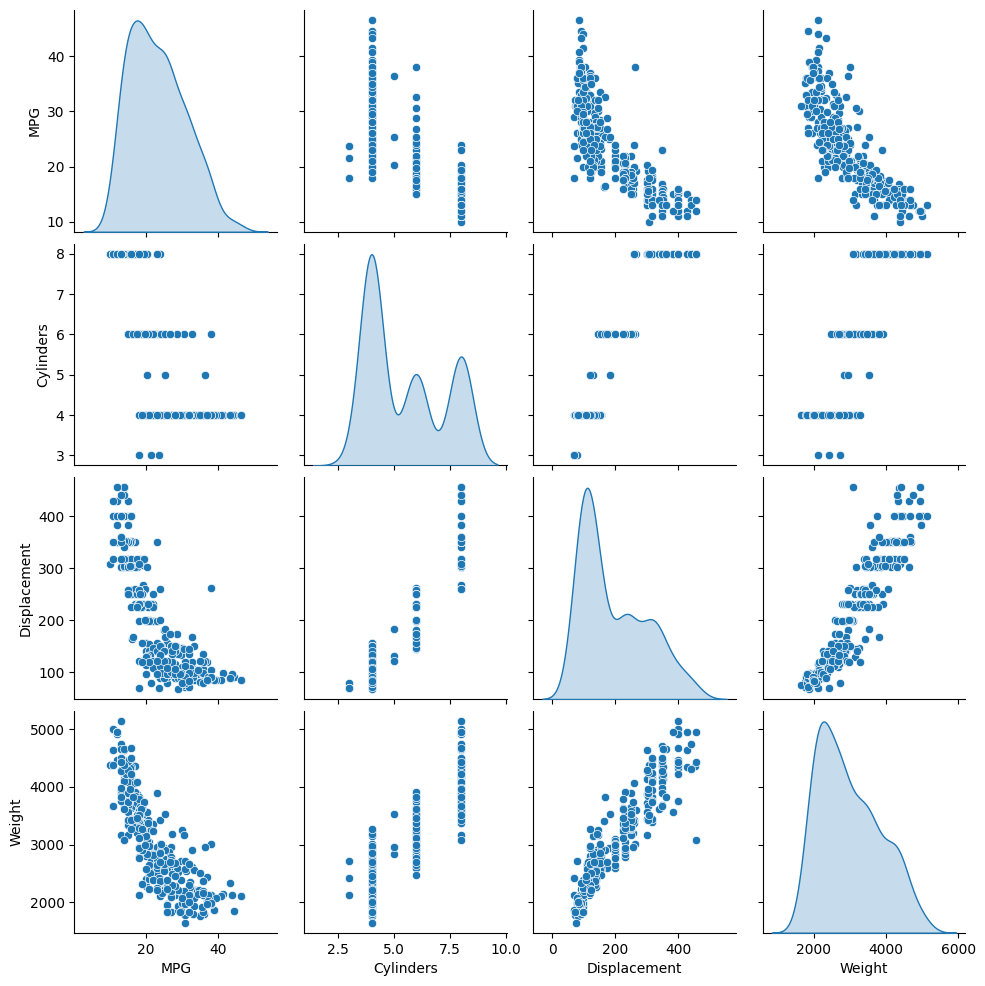

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

Sử dụng Seaborn pairplot giúp xác định mối quan hệ giữa các biến, như phân phối lệch phải của MPG, Displacement, và Weight, mối quan hệ ngược chiều giữa MPG với các biến còn lại, và mối quan hệ tuyến tính dương giữa Weight và Displacement. Biểu đồ hỗ trợ hiểu dữ liệu trước khi xây dựng mô hình.

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


ùng train_dataset.describe().transpose() để hiển thị bảng thống kê mô tả của các cột trong train_dataset, với các chỉ số thống kê làm cột.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

chuẩn bị huấn luyện và kiểm tra cho mô hình học máy bằng cách tách đặc trưng và nhãn từ các tập dữ liệu train_dataset, test_dataset

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


Dùng train_dataset.mean() và train_dataset.std() để tính giá trị trung bình và độ lệch chuẩn:

Mức tiêu thụ nhiên liệu: 23.31 (7.33)
Số lượng xi-lanh: 5.48 (1.7)
Dung tích xi-lanh: 195.32 (104.33)
Công suất: 104.86 (38.1)
Trọng lượng: 2990.25 (843.89)
Gia tốc: 15.56
Năm sản xuất: 75.89 (3.68)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Tạo ra một lớp Normalization trong Keras để chuẩn hóa dữ liệu đầu vào cho mô hình học máy, nó sẽ tính toán giá trị trung bình và độ lệch chuẩn trong dữ liệu đó

In [ ]:
normalizer.adapt(np.array(train_features))

dùng để chuẩn hóa dữ liệu trong TensorFlow, tính toán các giá trị cần thiết để chuẩn hóa dữ liệu, nhưng có thể cấu hình tùy chọn các mục đích cụ thể

In [ ]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In giá trị trung bình của mỗi đặc trưng trong train_features dưới dạng mảng 2D, với một hàng và nhiều cột, mỗi cột là trung bình của một đặc trưng.

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  # print('Normalized:', normalizer(first).numpy())

First example: [[4 90.0 75.0 2125.0 14.5 74 False False True]]



in ra giá trị ví dụ đầu tiên từ tập dữ liệu train_features với độ chính xác số học cố định và định dạng không hiển thị kí hiệu khoa học

In [ ]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


chuẩn hóa dữ liệu trong "Horsepower" của train_features bằng cách sử dụng lớp Normalization của TensorFlow

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

xây dựng và hiển thị tóm tắt về một mô hình học sâu đơn giản trong TensorFlow, được thiết kế để dự đoán một đầu ra từ đặc trưng

In [ ]:
horsepower_model.predict(horsepower[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[-1.215],
       [-0.686],
       [ 2.242],
       [-1.703],
       [-1.54 ],
       [-0.605],
       [-1.825],
       [-1.54 ],
       [-0.401],
       [-0.686]], dtype=float32)

dùng để dự đoán đầu ra của mô hình horsepower_model  cho 10 giá trị đầu tiên của đặc trưng "Horsepower"
kết quả trả về mảng các dự đoán cho 10 giá trị đầu vào "Horsepower"

In [ ]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

dùng để cấu hình quá trình huấn luyện của mô hình horsepower_model, thiết lập thuật toán tối ưu và hàm mất mát mà mô hình sử dụng trong quá trình huấn luyện.

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.3 s, sys: 243 ms, total: 6.54 s
Wall time: 7.63 s


Huấn luyện mô hình horsepower_model với dữ liệu "Horsepower" trong 100 vòng, dùng 80% dữ liệu huấn luyện và 20% xác thực, đồng thời đo thời gian thực hiện.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.808183,4.157177,95
96,3.806452,4.157639,96
97,3.805593,4.180878,97
98,3.804839,4.193873,98
99,3.803941,4.211218,99


chuyển thông tin huấn luyện của history vào một DataFrame hist là in ra 5 epoch cuối cùng

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

hàm plot_loss(history) vẽ một đồ thị thể hiện sự thay đổi của mất mát trên cả tập huấn luyện và tập xác thực qua các epoch.

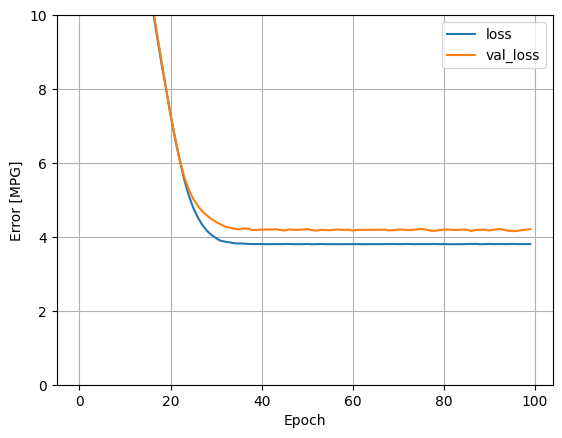

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

kết quả đánh giá sẽ được lưu vào test_results với từ khóa "horsepower_model"

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


đoạn mã này tạo ra một dãy các giá trị đầu vào từ 0 đến 250 và sử dụng mô hình đã huấn luyện để dự đoán giá trị mục tiêu y cho từng giá trị trong dãy đó

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

Hàm plot_horsepower vẽ đồ thị phân tán với dữ liệu huấn luyện và đường biểu diễn giá trị dự đoán của mô hình, giúp trực quan hóa mối quan hệ giữa Horsepower và MPG cũng như sự khớp giữa dự đoán và dữ liệu thực tế.

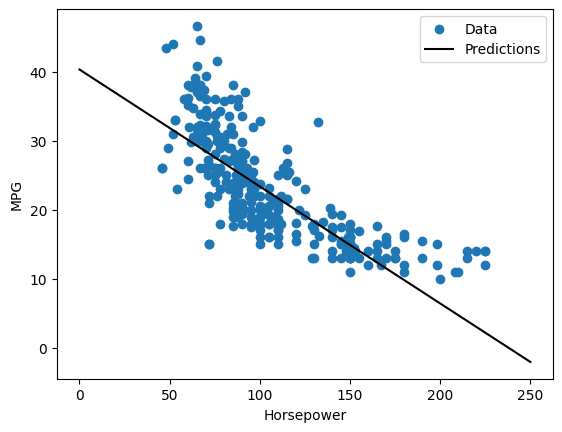

In [ ]:
plot_horsepower(x, y)

mô hình đã học được một mối quan hệ hợp lý giữa công suất và mức độ tiêu thụ nhiên liệu và với các dự đoán được vẽ bằng đường thẳng có độ dốc âm

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

tạo một lớp chuẩn hóa và một lớp Dense với một đơn vị đầu ra, thường dùng cho các bài toán hồi quy, mô hình này sẽ học cách dự đoán giá trị duy nhất từ đầu vào

In [ ]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[ 1.27 ],
       [ 0.323],
       [-0.636],
       [ 0.047],
       [ 1.151],
       [-0.618],
       [ 1.2  ],
       [-2.196],
       [ 0.125],
       [ 2.294]], dtype=float32)

Mã sử dụng mô hình linear_model đã huấn luyện để dự đoán giá trị mục tiêu cho 10 mẫu đầu tiên, giúp so sánh với giá trị thực tế và đánh giá hiệu suất mô hình.

In [ ]:
linear_model.layers[1].kernel

<KerasVariable shape=(9, 1), dtype=float32, path=sequential_1/dense_1/kernel>

trả về ma trận trọng số của lớp Dense thứ hai trong mô hình linear_model. ma trận này chứa các giá trị đầu vào mới

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Dòng này biên dịch mô hình linear_model với Adam optimizer (tốc độ học 0.1) và MAE làm hàm mất mát để đánh giá độ chính xác trong bài toán hồi quy.

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 6.18 s, sys: 255 ms, total: 6.44 s
Wall time: 6.75 s


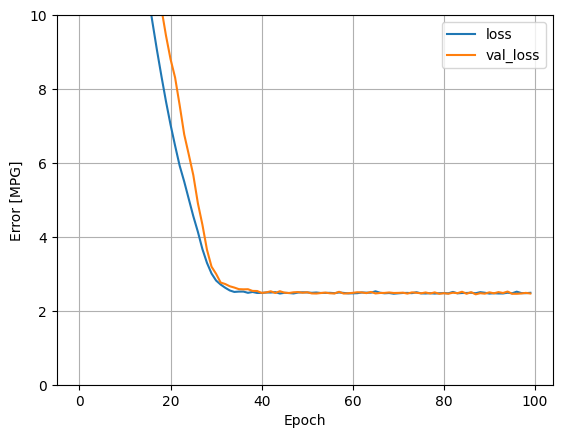

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Hàm xây dựng và biên dịch mô hình học sâu với lớp chuẩn hóa, 2 lớp Dense (64 đơn vị, ReLU) và lớp đầu ra, sử dụng MAE làm hàm mất mát và Adam optimizer (tốc độ học 0.001).

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.64 s, sys: 262 ms, total: 7.91 s
Wall time: 8.69 s


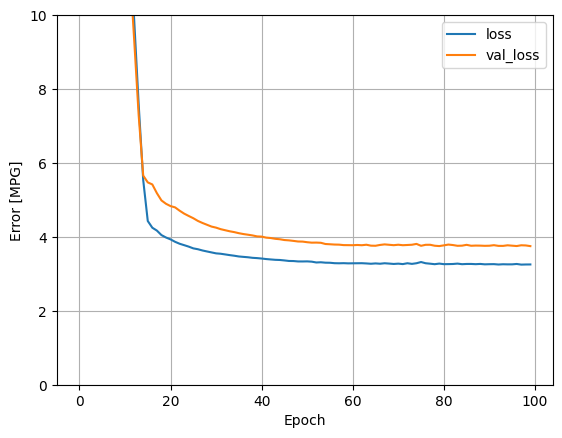

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


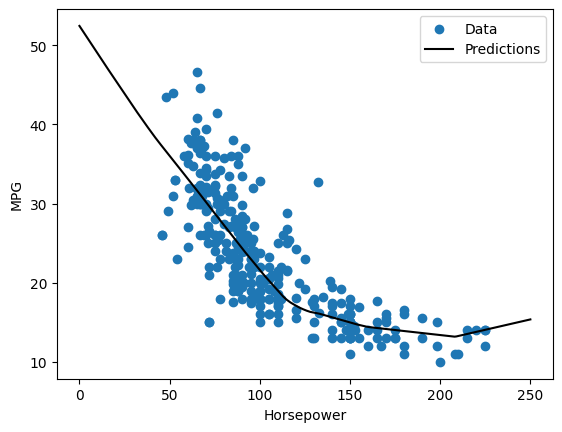

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (10, 9)                     │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.8 s, sys: 306 ms, total: 8.1 s
Wall time: 8.43 s


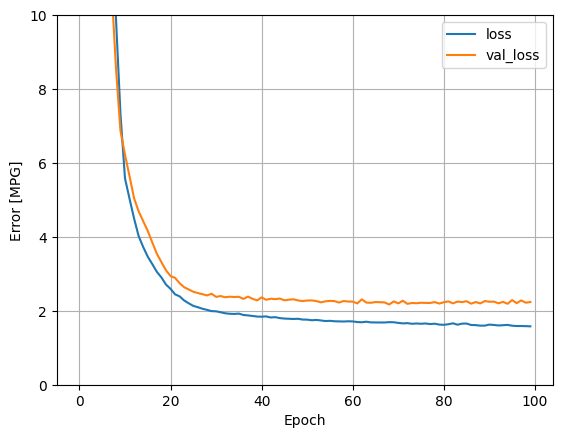

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.651428
linear_model,2.501379
dnn_horsepower_model,2.906558
dnn_model,1.752541


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


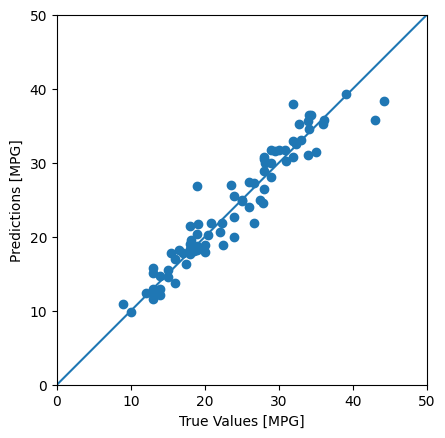

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

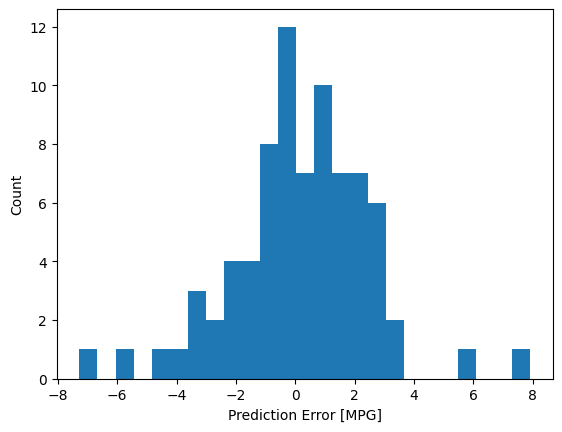

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model.keras')

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.651428
linear_model,2.501379
dnn_horsepower_model,2.906558
dnn_model,1.752541
reloaded,1.752541


tạo DataFrame từ test_results với chỉ mục 'Mean absolute error [MPG]' sau đó hoán đổi DataFrame để dễ dàng hiển thị kết quả